# Intro to Forecasting methodologies

1. We split our data into a training and test set based on dates (let’s say 1980-2000 for training and 2001-2010 for testing).
2. We try a few forecasting methodologies and ask them to predict what would happen 2001-2010,
3. then score their predictions against the test set and
4. pick the winner (the one with the lowest error).

This is known as walk forward validation.

In [1]:
# imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import Holt
from statsmodels.tsa.arima_model import ARIMA
from warnings import catch_warnings
from warnings import filterwarnings

## What is forecasting?

Forecasting is a special category of predictive modeling.
<br>

Traditional machine learning predicts A (let's say iced coffee sales) from B (temperature). 
<br>

Forecasting predicts A from A – future coffee sales from past coffee sales. This is only possible if past A correlates with present A (aka, there's autocorrelation).

How does forecasting work?
* We pick a form to describe the data (for example, a line if there's steady sales)
* Then find the best parameters to fit the form to the data (the slope to the line, for instance).

This is known as a parametric model - we fit a model of a certain shape over the data and adjust the parameters. (Other approaches would involve statistical machine learning, in which we do not make assumptions about the shape of the data and fit a model of a certain shape over it - we just let the ML model learn from the numbers.) This means we do not need any other datapoints than past sales - no feature engineering necessary.

So let's start by checking out our data - do we have autocorrelation and if so, what form might we fit through our data?

In [6]:
# load dataset
df = pd.read_table('data/birth.txt')
birth = df.set_index(pd.DatetimeIndex(pd.date_range(start='1/1/1980', end='12/31/2010', freq='M')))
birth.head()

In [31]:
# let's make the plots bigger and prettier
rcParams['figure.figsize'] = 18, 6
plt.style.use('fivethirtyeight')

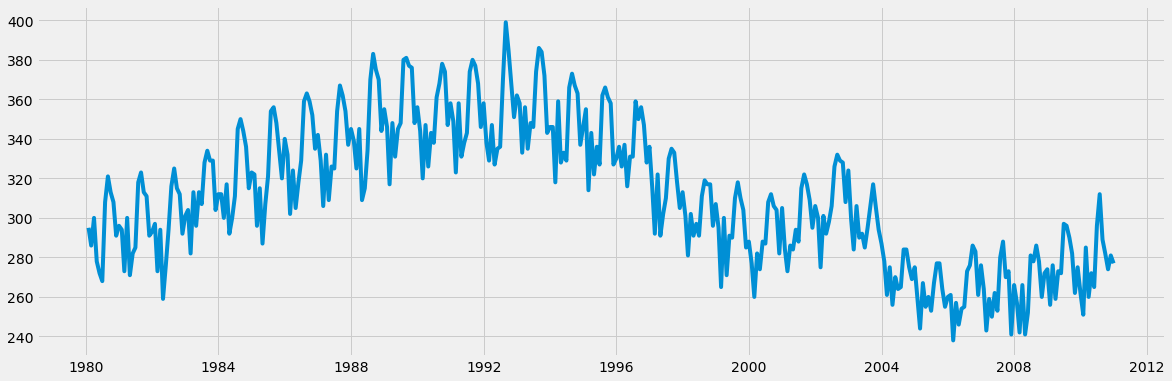

In [34]:
# let's see the data
plt.plot(birth)

The reason why this makes for a great dataset? It is rather unpredictable.

### Birth rates: autocorrelation and decomposition

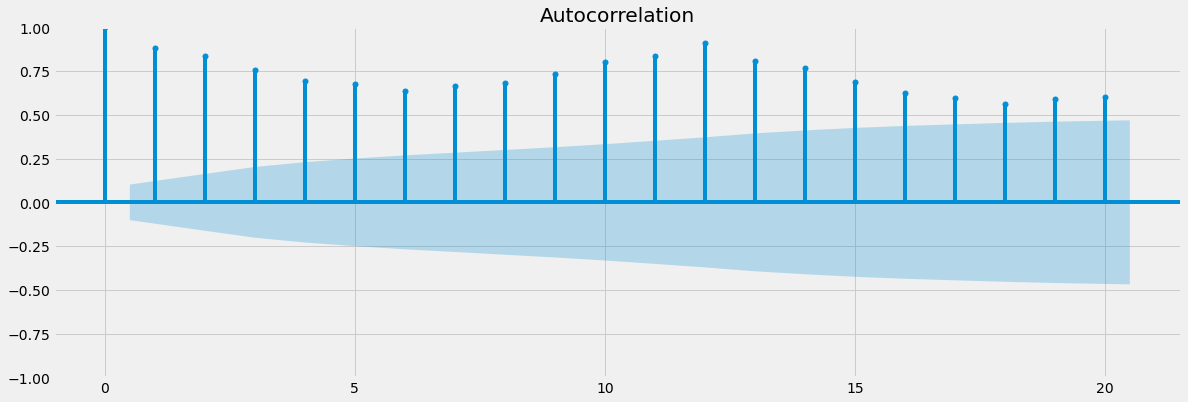

In [23]:
# plot autocorrelation
plot_acf(birth, lags= 20, alpha=0.05)
plt.show()

Autocorrelation is strong in some years but closer to 0.50 in others. 

Now let's see whether our data has any levels (line), trends (downward or upward slope), or seasonality (wiggly pattern) to it.

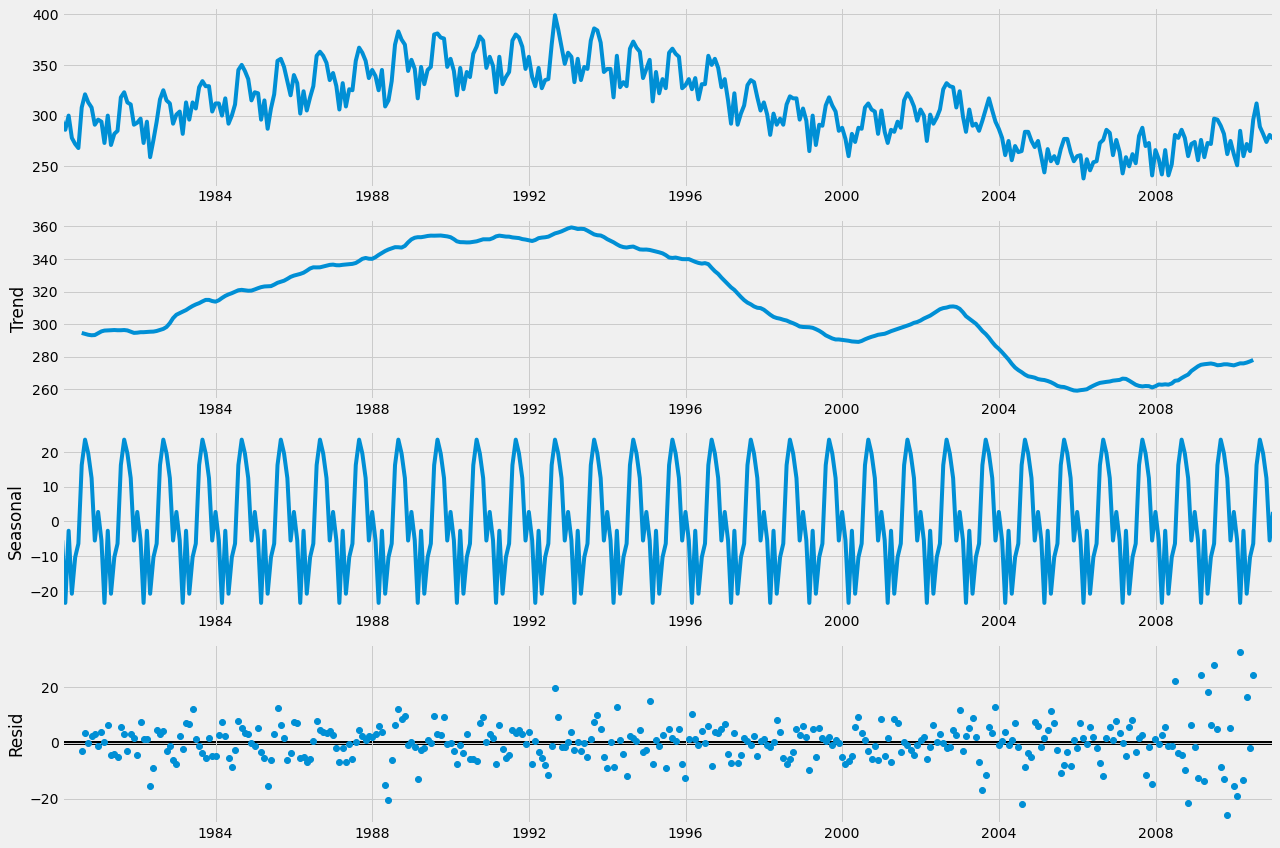

In [27]:
# additive seasonal decompose
seasonal_decompose(birth, model='additive').plot()
plt.show()

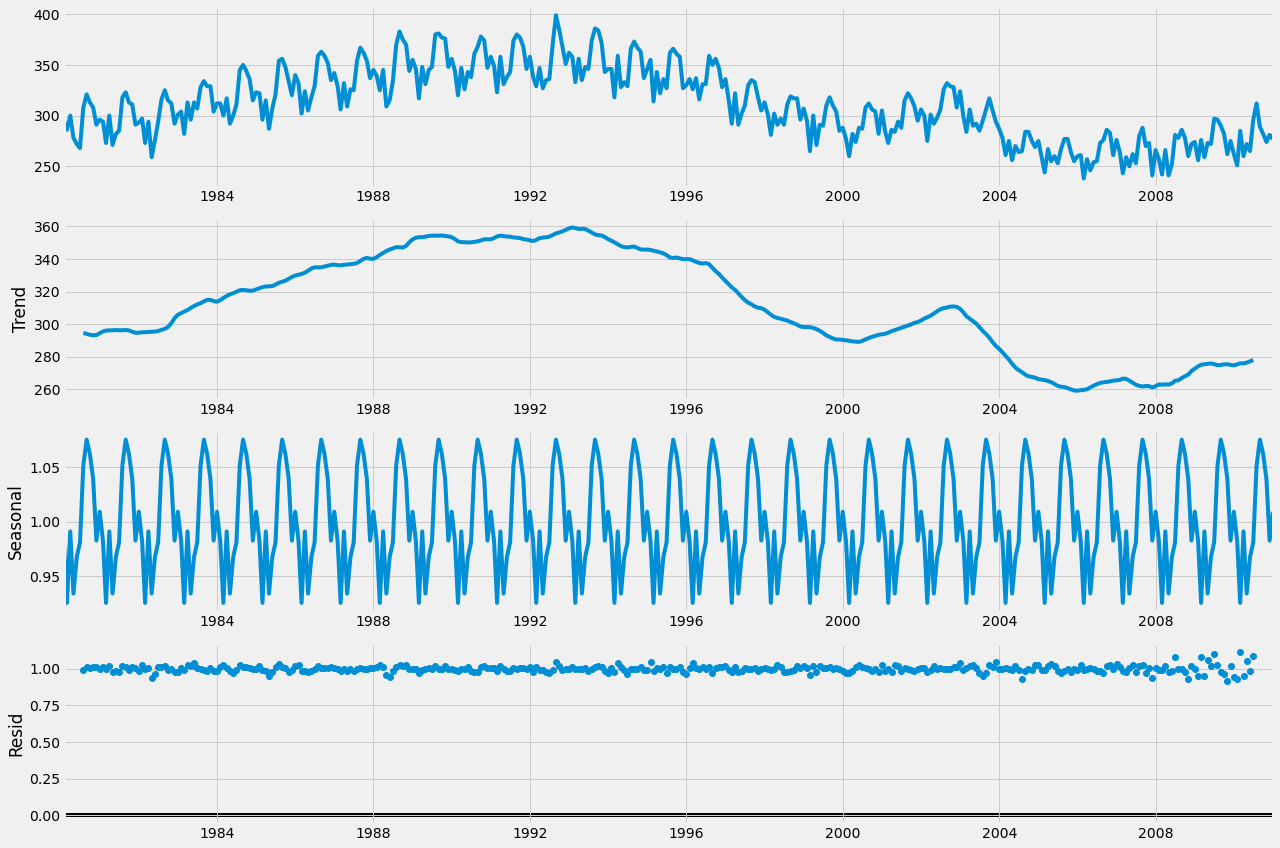

In [26]:
# then multiplicative
seasonal_decompose(birth, model='multiplicative').plot()
plt.show()

Both suggest that there is strong seasonality and an upward trendline until 1993. 

The residual is fairly volatile on the additive model - perhaps it is better to go with the multiplicative model, since it only struggles to fit the data post-2008.

### Exponential Smoothing

The first family of models are called Holt-Winters or exponential smoothing. 

Holt-Winters has several versions:
* simple exponential smoothing for level line only
* double (aka Holt) for level + trend (up and down)
* triple for level + seasonality
* Holt-Winters for level + trend + seasonality.

(See additional notebooks in my repo about exponential smoothing with straight Python and with the `statsmodels` library.

### ARIMA

The other family of forecasting methodologies is called Box-Jenkins or ARIMA. It is basically based on autocorrelation. The idea is that if we can figure out a way to remove all autocorrelation (let's say, we take steps 1, 2, 3 and then land on a dataset that is just noise), then we can take today's iced coffee sales, apply 3, 2, 1 and get tomorrow's iced coffee sales.

The full name is Autoregressive Integrated Moving Average - it refers to the various steps you take (the number of time lags of the autoregressive model, the number of times the data have had past values subtracted in the integrated part, and the size of averages in the moving-average model). Just like Holt-Winters, Box-Jenkins has a whole bunch of versions - just AR, ARIMA, SARIMA, etc.